# Getting started with Task 1

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database
- ECG lead II re-sampled to the sampling frequency of 125Hz as the input (from [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf))
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


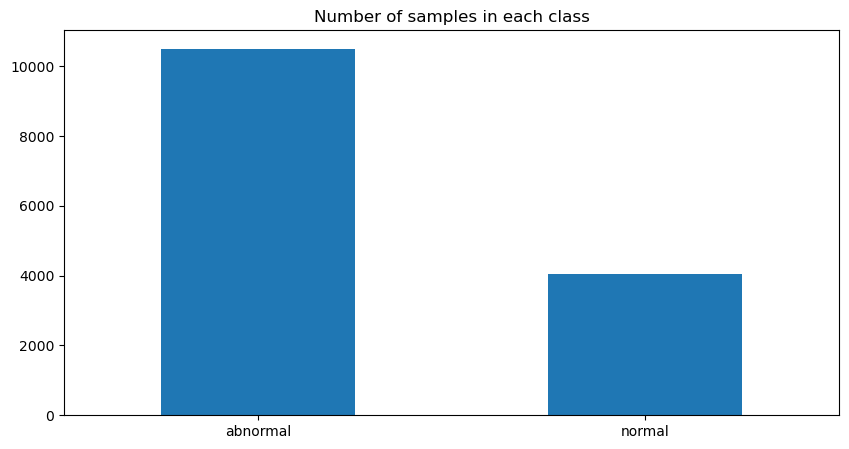

In [2]:
df_ptbd_normal = pd.read_csv("ecg_dataset/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("ecg_dataset/ptbdb_abnormal.csv", header = None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal", 
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure 
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

# Start Here

In [3]:
import os
from matplotlib.legend_handler import HandlerLine2D
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import datasets, metrics, model_selection, svm
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle as pk

In [4]:
df_ptbd_normal = pd.read_csv("ecg_dataset/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("ecg_dataset/ptbdb_abnormal.csv", header = None)

In [5]:
df_ptbd.shape

(14552, 188)

In [6]:
df_ptbd_normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_ptbd_abnormal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

The last time value is :  1488.0


In [9]:
df1L= df_ptbd_normal.iloc[:,-1:]
df1L

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4041,0.0
4042,0.0
4043,0.0
4044,0.0


In [10]:
df2L = df_ptbd_abnormal.iloc[:,-1:]
df2L

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
10501,1.0
10502,1.0
10503,1.0
10504,1.0


In [11]:
col = 'label'
df1 = df_ptbd_normal.loc[:, df_ptbd_normal.columns != col]
df2 = df_ptbd_abnormal.loc[:, df_ptbd_abnormal.columns != col]
df1

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1416.0,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
x_rem1, x_test1, y_rem1, y_test1 = train_test_split(df1,df1L, test_size=0.2, random_state=8, shuffle=True)
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x_rem1, y_rem1, test_size=0.2)

In [13]:
x_rem2, x_test2, y_rem2, y_test2 = train_test_split(df2,df2L, test_size=0.2, random_state=8, shuffle=True)
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x_rem2, y_rem2, test_size=0.2)

In [14]:
x_train = pd.concat([x_train1, x_train2], axis = 0)
y_train = pd.concat([y_train1, y_train2], axis = 0)

x_test = pd.concat([x_test1, x_test2], axis = 0)
y_test = pd.concat([y_test1, y_test2], axis = 0)

x_valid = pd.concat([x_valid1, x_valid2], axis = 0)
y_valid = pd.concat([y_valid1, y_valid2], axis = 0)

In [15]:
# x_train.shape
# y_train.shape

# x_test.shape
# y_test.shape

# x_valid.shape
# y_valid.shape

In [74]:
baseModel = LogisticRegression().fit(x_train,y_train)
baseModel.score(x_valid, y_valid)

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8273937312151138

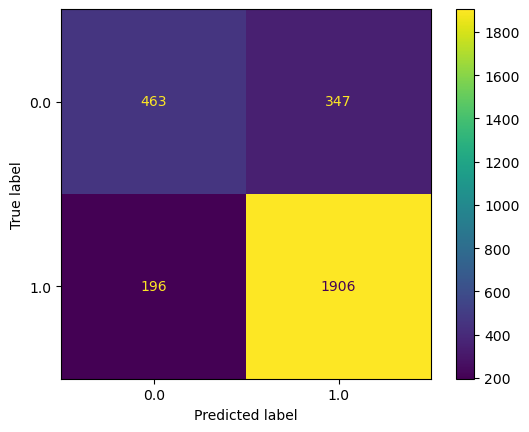

In [75]:
predictions = baseModel.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=baseModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseModel.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BaseModel_ConfusionMatrixLog.png')

In [71]:
import pickle as pk
n = 20
compiled_models = []


Cs = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]
tolerances = [0.001, 0.0001]
duals = [True, False]
penalties = ['l2', 'l1', 'elasticnet']
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [1000]
class_weights = ['balanced', 'None']
fit_intercepts = [True, False]
warm_starts = [True, False]

counter = 0

for C in Cs:
    for tol in tolerances:
        for dual in duals:
            for penalty in penalties:
                for solver in solvers:
                    for max_iter in max_iters:
                        for class_weight in class_weights:
                            for fit_intercept in fit_intercepts:
                                for warm_start in warm_starts:
                        
                                    print(f"Compiled Model: {counter}\n")

                                    try:
                                        model = LogisticRegression(penalty=penalty, 
                                                                   dual=dual, 
                                                                   tol=tol, 
                                                                   C=C, 
                                                                   solver=solver, 
                                                                   max_iter=max_iter, 
                                                                   class_weight = class_weight,
                                                                   fit_intercept = fit_intercept, 
                                                                   warm_start = warm_start).fit(x_train, y_train)
                                    except:
                                        counter += 1
                                        continue

                                    compiled_models.append([float(model.score(x_valid, y_valid)), model])
                                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLEDfiles/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 9



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 10



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 11



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled Model: 50

Compiled Model: 51

Compiled Model: 52

Compiled Model: 53

Compiled Model: 54

Compiled Model: 55

Compiled Model: 56

Compiled Model: 57

Compiled Model: 58

Compiled Model: 59

Compiled Model: 60

Compiled Model: 61



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 97



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 98



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 99



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 100

Compiled Model: 101

Compiled Model: 102

Compiled Model: 103

Compiled Model: 104



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 105



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 106



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 107



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 108

Compiled Model: 109

Compiled Model: 110

Compiled Model: 111

Compiled Model: 112



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 113



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 114



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 115



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 116

Compiled Model: 117

Compiled Model: 118

Compiled Model: 119

Compiled Model: 120



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 121



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 122



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 123



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 124

Compiled Model: 125

Compiled Model: 126

Compiled Model: 127

Compiled Model: 128

Compiled Model: 129

Compiled Model: 130

Compiled Model: 131

Compiled Model: 132

Compiled Model: 133

Compiled Model: 134

Compiled Model: 135

Compiled Model: 136



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 137



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 138



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 139



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 140

Compiled Model: 141

Compiled Model: 142

Compiled Model: 143

Compiled Model: 144

Compiled Model: 145

Compiled Model: 146

Compiled Model: 147

Compiled Model: 148

Compiled Model: 149

Compiled Model: 150

Compiled Model: 151

Compiled Model: 152



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 153



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 154



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 155



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 156

Compiled Model: 157

Compiled Model: 158

Compiled Model: 159

Compiled Model: 160

Compiled Model: 161

Compiled Model: 162

Compiled Model: 163

Compiled Model: 164

Compiled Model: 165

Compiled Model: 166

Compiled Model: 167

Compiled Model: 168

Compiled Model: 169

Compiled Model: 170

Compiled Model: 171

Compiled Model: 172

Compiled Model: 173

Compiled Model: 174

Compiled Model: 175

Compiled Model: 176

Compiled Model: 177

Compiled Model: 178

Compiled Model: 179

Compiled Model: 180

Compiled Model: 181

Compiled Model: 182

Compiled Model: 183

Compiled Model: 184

Compiled Model: 185

Compiled Model: 186

Compiled Model: 187

Compiled Model: 188

Compiled Model: 189

Compiled Model: 190

Compiled Model: 191

Compiled Model: 192

Compiled Model: 193

Compiled Model: 194

Compiled Model: 195

Compiled Model: 196

Compiled Model: 197

Compiled Model: 198

Compiled Model: 199

Compiled Model: 200



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 201



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 202



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 203



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 204

Compiled Model: 205

Compiled Model: 206

Compiled Model: 207

Compiled Model: 208

Compiled Model: 209

Compiled Model: 210

Compiled Model: 211

Compiled Model: 212

Compiled Model: 213

Compiled Model: 214

Compiled Model: 215

Compiled Model: 216

Compiled Model: 217

Compiled Model: 218

Compiled Model: 219

Compiled Model: 220

Compiled Model: 221

Compiled Model: 222

Compiled Model: 223

Compiled Model: 224

Compiled Model: 225

Compiled Model: 226

Compiled Model: 227

Compiled Model: 228

Compiled Model: 229

Compiled Model: 230

Compiled Model: 231

Compiled Model: 232

Compiled Model: 233

Compiled Model: 234

Compiled Model: 235

Compiled Model: 236

Compiled Model: 237

Compiled Model: 238

Compiled Model: 239

Compiled Model: 240

Compiled Model: 241

Compiled Model: 242

Compiled Model: 243

Compiled Model: 244

Compiled Model: 245

Compiled Model: 246

Compiled Model: 247

Compiled Model: 248

Compiled Model: 249

Compiled Model: 250

Compiled Mode

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 289



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 290



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 291



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 292

Compiled Model: 293

Compiled Model: 294

Compiled Model: 295

Compiled Model: 296



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 297



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 298



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 299



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 300

Compiled Model: 301

Compiled Model: 302

Compiled Model: 303

Compiled Model: 304



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 305



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 306



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 307



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 308

Compiled Model: 309

Compiled Model: 310

Compiled Model: 311

Compiled Model: 312



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 313



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 314



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 315



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 316

Compiled Model: 317

Compiled Model: 318

Compiled Model: 319

Compiled Model: 320

Compiled Model: 321

Compiled Model: 322

Compiled Model: 323

Compiled Model: 324

Compiled Model: 325

Compiled Model: 326

Compiled Model: 327

Compiled Model: 328



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 329



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 330



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 331



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 332

Compiled Model: 333

Compiled Model: 334

Compiled Model: 335

Compiled Model: 336

Compiled Model: 337

Compiled Model: 338

Compiled Model: 339

Compiled Model: 340

Compiled Model: 341

Compiled Model: 342

Compiled Model: 343

Compiled Model: 344



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 345



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 346



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 347



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Compiled Model: 348

Compiled Model: 349

Compiled Model: 350

Compiled Model: 351

Compiled Model: 352

Compiled Model: 353

Compiled Model: 354

Compiled Model: 355

Compiled Model: 356

Compiled Model: 357

Compiled Model: 358

Compiled Model: 359

Compiled Model: 360

Compiled Model: 361

Compiled Model: 362

Compiled Model: 363

Compiled Model: 364

Compiled Model: 365

Compiled Model: 366

Compiled Model: 367

Compiled Model: 368

Compiled Model: 369

Compiled Model: 370

Compiled Model: 371

Compiled Model: 372

Compiled Model: 373

Compiled Model: 374

Compiled Model: 375

Compiled Model: 376

Compiled Model: 377

Compiled Model: 378

Compiled Model: 379

Compiled Model: 380

Compiled Model: 381

Compiled Model: 382

Compiled Model: 383

Compiled Model: 384

Compiled Model: 385

Compiled Model: 386

Compiled Model: 387

Compiled Model: 388

Compiled Model: 389

Compiled Model: 390

Compiled Model: 391

Compiled Model: 392

Compiled Model: 393

Compiled Model: 394



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 395

Compiled Model: 396

Compiled Model: 397

Compiled Model: 398

Compiled Model: 399

Compiled Model: 400

Compiled Model: 401

Compiled Model: 402

Compiled Model: 403

Compiled Model: 404

Compiled Model: 405

Compiled Model: 406

Compiled Model: 407

Compiled Model: 408

Compiled Model: 409

Compiled Model: 410

Compiled Model: 411

Compiled Model: 412

Compiled Model: 413

Compiled Model: 414

Compiled Model: 415

Compiled Model: 416

Compiled Model: 417

Compiled Model: 418

Compiled Model: 419

Compiled Model: 420

Compiled Model: 421

Compiled Model: 422

Compiled Model: 423

Compiled Model: 424

Compiled Model: 425

Compiled Model: 426

Compiled Model: 427

Compiled Model: 428

Compiled Model: 429

Compiled Model: 430

Compiled Model: 431

Compiled Model: 432

Compiled Model: 433

Compiled Model: 434

Compiled Model: 435

Compiled Model: 436

Compiled Model: 437

Compiled Model: 438

Compiled Model: 439

Compiled Model: 440

Compiled Model: 441

Compiled Mode

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 481



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 482

Compiled Model: 483



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 484

Compiled Model: 485

Compiled Model: 486

Compiled Model: 487

Compiled Model: 488

Compiled Model: 489

Compiled Model: 490



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 491

Compiled Model: 492

Compiled Model: 493

Compiled Model: 494

Compiled Model: 495

Compiled Model: 496



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 497



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 498



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 499



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 500

Compiled Model: 501

Compiled Model: 502

Compiled Model: 503

Compiled Model: 504



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 505



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 506



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 507



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 508

Compiled Model: 509

Compiled Model: 510

Compiled Model: 511

Compiled Model: 512

Compiled Model: 513

Compiled Model: 514

Compiled Model: 515

Compiled Model: 516

Compiled Model: 517

Compiled Model: 518

Compiled Model: 519

Compiled Model: 520



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 521



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 522



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 523



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 524

Compiled Model: 525

Compiled Model: 526

Compiled Model: 527

Compiled Model: 528

Compiled Model: 529

Compiled Model: 530

Compiled Model: 531

Compiled Model: 532

Compiled Model: 533

Compiled Model: 534

Compiled Model: 535

Compiled Model: 536



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 537



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 538



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 539



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 540

Compiled Model: 541

Compiled Model: 542

Compiled Model: 543

Compiled Model: 544

Compiled Model: 545

Compiled Model: 546

Compiled Model: 547

Compiled Model: 548

Compiled Model: 549

Compiled Model: 550

Compiled Model: 551

Compiled Model: 552

Compiled Model: 553

Compiled Model: 554

Compiled Model: 555

Compiled Model: 556

Compiled Model: 557

Compiled Model: 558

Compiled Model: 559

Compiled Model: 560

Compiled Model: 561

Compiled Model: 562

Compiled Model: 563

Compiled Model: 564

Compiled Model: 565

Compiled Model: 566

Compiled Model: 567

Compiled Model: 568

Compiled Model: 569

Compiled Model: 570

Compiled Model: 571

Compiled Model: 572

Compiled Model: 573

Compiled Model: 574

Compiled Model: 575

Compiled Model: 576

Compiled Model: 577

Compiled Model: 578

Compiled Model: 579

Compiled Model: 580

Compiled Model: 581

Compiled Model: 582

Compiled Model: 583

Compiled Model: 584



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 585



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 586

Compiled Model: 587



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 588

Compiled Model: 589

Compiled Model: 590

Compiled Model: 591

Compiled Model: 592

Compiled Model: 593

Compiled Model: 594

Compiled Model: 595

Compiled Model: 596

Compiled Model: 597

Compiled Model: 598

Compiled Model: 599

Compiled Model: 600

Compiled Model: 601

Compiled Model: 602

Compiled Model: 603

Compiled Model: 604

Compiled Model: 605

Compiled Model: 606

Compiled Model: 607

Compiled Model: 608

Compiled Model: 609

Compiled Model: 610

Compiled Model: 611

Compiled Model: 612

Compiled Model: 613

Compiled Model: 614

Compiled Model: 615

Compiled Model: 616

Compiled Model: 617

Compiled Model: 618

Compiled Model: 619

Compiled Model: 620

Compiled Model: 621

Compiled Model: 622

Compiled Model: 623

Compiled Model: 624

Compiled Model: 625

Compiled Model: 626

Compiled Model: 627

Compiled Model: 628

Compiled Model: 629

Compiled Model: 630

Compiled Model: 631

Compiled Model: 632

Compiled Model: 633

Compiled Model: 634

Compiled Mode

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 673



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 674

Compiled Model: 675



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 676

Compiled Model: 677

Compiled Model: 678

Compiled Model: 679

Compiled Model: 680



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 681



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 682



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 683



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 684

Compiled Model: 685

Compiled Model: 686

Compiled Model: 687

Compiled Model: 688



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 689



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 690



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 691



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 692

Compiled Model: 693

Compiled Model: 694

Compiled Model: 695

Compiled Model: 696



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 697



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 698



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 699



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 700

Compiled Model: 701

Compiled Model: 702

Compiled Model: 703

Compiled Model: 704

Compiled Model: 705

Compiled Model: 706

Compiled Model: 707

Compiled Model: 708

Compiled Model: 709

Compiled Model: 710

Compiled Model: 711

Compiled Model: 712



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 713



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 714



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 715



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 716

Compiled Model: 717

Compiled Model: 718

Compiled Model: 719

Compiled Model: 720

Compiled Model: 721

Compiled Model: 722

Compiled Model: 723

Compiled Model: 724

Compiled Model: 725

Compiled Model: 726

Compiled Model: 727

Compiled Model: 728



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 729



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 730



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 731



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 732

Compiled Model: 733

Compiled Model: 734

Compiled Model: 735

Compiled Model: 736

Compiled Model: 737

Compiled Model: 738

Compiled Model: 739

Compiled Model: 740

Compiled Model: 741

Compiled Model: 742

Compiled Model: 743

Compiled Model: 744

Compiled Model: 745

Compiled Model: 746

Compiled Model: 747

Compiled Model: 748

Compiled Model: 749

Compiled Model: 750

Compiled Model: 751

Compiled Model: 752

Compiled Model: 753

Compiled Model: 754

Compiled Model: 755

Compiled Model: 756

Compiled Model: 757

Compiled Model: 758

Compiled Model: 759

Compiled Model: 760

Compiled Model: 761

Compiled Model: 762

Compiled Model: 763

Compiled Model: 764

Compiled Model: 765

Compiled Model: 766

Compiled Model: 767

Compiled Model: 768

Compiled Model: 769

Compiled Model: 770

Compiled Model: 771

Compiled Model: 772

Compiled Model: 773

Compiled Model: 774

Compiled Model: 775

Compiled Model: 776



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 777

Compiled Model: 778



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 779

Compiled Model: 780

Compiled Model: 781

Compiled Model: 782

Compiled Model: 783

Compiled Model: 784

Compiled Model: 785

Compiled Model: 786

Compiled Model: 787

Compiled Model: 788

Compiled Model: 789

Compiled Model: 790

Compiled Model: 791

Compiled Model: 792

Compiled Model: 793

Compiled Model: 794

Compiled Model: 795

Compiled Model: 796

Compiled Model: 797

Compiled Model: 798

Compiled Model: 799

Compiled Model: 800

Compiled Model: 801

Compiled Model: 802

Compiled Model: 803

Compiled Model: 804

Compiled Model: 805

Compiled Model: 806

Compiled Model: 807

Compiled Model: 808

Compiled Model: 809

Compiled Model: 810

Compiled Model: 811

Compiled Model: 812

Compiled Model: 813

Compiled Model: 814

Compiled Model: 815

Compiled Model: 816

Compiled Model: 817

Compiled Model: 818

Compiled Model: 819

Compiled Model: 820

Compiled Model: 821

Compiled Model: 822

Compiled Model: 823

Compiled Model: 824

Compiled Model: 825

Compiled Mode

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 865

Compiled Model: 866



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 867

Compiled Model: 868

Compiled Model: 869

Compiled Model: 870

Compiled Model: 871

Compiled Model: 872



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 873

Compiled Model: 874



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 875

Compiled Model: 876

Compiled Model: 877

Compiled Model: 878

Compiled Model: 879

Compiled Model: 880



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 881



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 882

Compiled Model: 883



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 884

Compiled Model: 885

Compiled Model: 886

Compiled Model: 887

Compiled Model: 888



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 889



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 890



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 891



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 892

Compiled Model: 893

Compiled Model: 894

Compiled Model: 895

Compiled Model: 896

Compiled Model: 897

Compiled Model: 898

Compiled Model: 899

Compiled Model: 900

Compiled Model: 901

Compiled Model: 902

Compiled Model: 903

Compiled Model: 904

Compiled Model: 905



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 906

Compiled Model: 907



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 908

Compiled Model: 909

Compiled Model: 910

Compiled Model: 911

Compiled Model: 912

Compiled Model: 913

Compiled Model: 914

Compiled Model: 915

Compiled Model: 916

Compiled Model: 917

Compiled Model: 918

Compiled Model: 919

Compiled Model: 920



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 921



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 922



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 923



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 924

Compiled Model: 925

Compiled Model: 926

Compiled Model: 927

Compiled Model: 928

Compiled Model: 929

Compiled Model: 930

Compiled Model: 931

Compiled Model: 932

Compiled Model: 933

Compiled Model: 934

Compiled Model: 935

Compiled Model: 936

Compiled Model: 937

Compiled Model: 938

Compiled Model: 939

Compiled Model: 940

Compiled Model: 941

Compiled Model: 942

Compiled Model: 943

Compiled Model: 944

Compiled Model: 945

Compiled Model: 946

Compiled Model: 947

Compiled Model: 948

Compiled Model: 949

Compiled Model: 950

Compiled Model: 951

Compiled Model: 952

Compiled Model: 953

Compiled Model: 954

Compiled Model: 955

Compiled Model: 956

Compiled Model: 957

Compiled Model: 958

Compiled Model: 959

Compiled Model: 960

Compiled Model: 961

Compiled Model: 962

Compiled Model: 963

Compiled Model: 964

Compiled Model: 965

Compiled Model: 966

Compiled Model: 967

Compiled Model: 968

Compiled Model: 969



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 970

Compiled Model: 971



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 972

Compiled Model: 973

Compiled Model: 974

Compiled Model: 975

Compiled Model: 976

Compiled Model: 977

Compiled Model: 978

Compiled Model: 979

Compiled Model: 980

Compiled Model: 981

Compiled Model: 982

Compiled Model: 983

Compiled Model: 984

Compiled Model: 985

Compiled Model: 986

Compiled Model: 987

Compiled Model: 988

Compiled Model: 989

Compiled Model: 990

Compiled Model: 991

Compiled Model: 992

Compiled Model: 993

Compiled Model: 994

Compiled Model: 995

Compiled Model: 996

Compiled Model: 997

Compiled Model: 998

Compiled Model: 999

Compiled Model: 1000

Compiled Model: 1001

Compiled Model: 1002

Compiled Model: 1003

Compiled Model: 1004

Compiled Model: 1005

Compiled Model: 1006

Compiled Model: 1007

Compiled Model: 1008

Compiled Model: 1009

Compiled Model: 1010

Compiled Model: 1011

Compiled Model: 1012

Compiled Model: 1013

Compiled Model: 1014

Compiled Model: 1015

Compiled Model: 1016

Compiled Model: 1017

Compiled Model: 

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1057

Compiled Model: 1058



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1059

Compiled Model: 1060

Compiled Model: 1061

Compiled Model: 1062

Compiled Model: 1063

Compiled Model: 1064



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1065

Compiled Model: 1066



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1067

Compiled Model: 1068

Compiled Model: 1069

Compiled Model: 1070

Compiled Model: 1071

Compiled Model: 1072



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1073



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1074



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1075



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1076

Compiled Model: 1077

Compiled Model: 1078

Compiled Model: 1079

Compiled Model: 1080



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1081



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1082



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1083



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1084

Compiled Model: 1085

Compiled Model: 1086

Compiled Model: 1087

Compiled Model: 1088

Compiled Model: 1089

Compiled Model: 1090

Compiled Model: 1091

Compiled Model: 1092

Compiled Model: 1093

Compiled Model: 1094

Compiled Model: 1095

Compiled Model: 1096

Compiled Model: 1097



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1098

Compiled Model: 1099



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1100

Compiled Model: 1101

Compiled Model: 1102

Compiled Model: 1103

Compiled Model: 1104

Compiled Model: 1105

Compiled Model: 1106

Compiled Model: 1107

Compiled Model: 1108

Compiled Model: 1109

Compiled Model: 1110

Compiled Model: 1111

Compiled Model: 1112



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1113



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1114



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1115



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1116

Compiled Model: 1117

Compiled Model: 1118

Compiled Model: 1119

Compiled Model: 1120

Compiled Model: 1121

Compiled Model: 1122

Compiled Model: 1123

Compiled Model: 1124

Compiled Model: 1125

Compiled Model: 1126

Compiled Model: 1127

Compiled Model: 1128

Compiled Model: 1129

Compiled Model: 1130

Compiled Model: 1131

Compiled Model: 1132

Compiled Model: 1133

Compiled Model: 1134

Compiled Model: 1135

Compiled Model: 1136

Compiled Model: 1137

Compiled Model: 1138

Compiled Model: 1139

Compiled Model: 1140

Compiled Model: 1141

Compiled Model: 1142

Compiled Model: 1143

Compiled Model: 1144

Compiled Model: 1145

Compiled Model: 1146

Compiled Model: 1147

Compiled Model: 1148

Compiled Model: 1149

Compiled Model: 1150

Compiled Model: 1151

Compiled Model: 1152

Compiled Model: 1153

Compiled Model: 1154

Compiled Model: 1155

Compiled Model: 1156

Compiled Model: 1157

Compiled Model: 1158

Compiled Model: 1159

Compiled Model: 1160

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1163

Compiled Model: 1164

Compiled Model: 1165

Compiled Model: 1166

Compiled Model: 1167

Compiled Model: 1168

Compiled Model: 1169

Compiled Model: 1170

Compiled Model: 1171

Compiled Model: 1172

Compiled Model: 1173

Compiled Model: 1174

Compiled Model: 1175

Compiled Model: 1176

Compiled Model: 1177

Compiled Model: 1178

Compiled Model: 1179

Compiled Model: 1180

Compiled Model: 1181

Compiled Model: 1182

Compiled Model: 1183

Compiled Model: 1184

Compiled Model: 1185

Compiled Model: 1186

Compiled Model: 1187

Compiled Model: 1188

Compiled Model: 1189

Compiled Model: 1190

Compiled Model: 1191

Compiled Model: 1192

Compiled Model: 1193

Compiled Model: 1194

Compiled Model: 1195

Compiled Model: 1196

Compiled Model: 1197

Compiled Model: 1198

Compiled Model: 1199

Compiled Model: 1200

Compiled Model: 1201

Compiled Model: 1202

Compiled Model: 1203

Compiled Model: 1204

Compiled Model: 1205

Compiled Model: 1206

Compiled Model: 1207

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1250

Compiled Model: 1251

Compiled Model: 1252

Compiled Model: 1253

Compiled Model: 1254

Compiled Model: 1255

Compiled Model: 1256



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1257

Compiled Model: 1258

Compiled Model: 1259



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1260

Compiled Model: 1261

Compiled Model: 1262

Compiled Model: 1263

Compiled Model: 1264

Compiled Model: 1265



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1266

Compiled Model: 1267



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1268

Compiled Model: 1269

Compiled Model: 1270

Compiled Model: 1271

Compiled Model: 1272



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1273



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1274



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1275



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1276

Compiled Model: 1277

Compiled Model: 1278

Compiled Model: 1279

Compiled Model: 1280

Compiled Model: 1281

Compiled Model: 1282

Compiled Model: 1283

Compiled Model: 1284

Compiled Model: 1285

Compiled Model: 1286

Compiled Model: 1287

Compiled Model: 1288

Compiled Model: 1289

Compiled Model: 1290

Compiled Model: 1291

Compiled Model: 1292

Compiled Model: 1293

Compiled Model: 1294

Compiled Model: 1295

Compiled Model: 1296

Compiled Model: 1297

Compiled Model: 1298

Compiled Model: 1299

Compiled Model: 1300

Compiled Model: 1301

Compiled Model: 1302

Compiled Model: 1303

Compiled Model: 1304



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1305

Compiled Model: 1306

Compiled Model: 1307



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1308

Compiled Model: 1309

Compiled Model: 1310

Compiled Model: 1311

Compiled Model: 1312

Compiled Model: 1313

Compiled Model: 1314

Compiled Model: 1315

Compiled Model: 1316

Compiled Model: 1317

Compiled Model: 1318

Compiled Model: 1319

Compiled Model: 1320

Compiled Model: 1321

Compiled Model: 1322

Compiled Model: 1323

Compiled Model: 1324

Compiled Model: 1325

Compiled Model: 1326

Compiled Model: 1327

Compiled Model: 1328

Compiled Model: 1329

Compiled Model: 1330

Compiled Model: 1331

Compiled Model: 1332

Compiled Model: 1333

Compiled Model: 1334

Compiled Model: 1335

Compiled Model: 1336

Compiled Model: 1337

Compiled Model: 1338

Compiled Model: 1339

Compiled Model: 1340

Compiled Model: 1341

Compiled Model: 1342

Compiled Model: 1343

Compiled Model: 1344

Compiled Model: 1345

Compiled Model: 1346

Compiled Model: 1347

Compiled Model: 1348

Compiled Model: 1349

Compiled Model: 1350

Compiled Model: 1351

Compiled Model: 1352

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1354

Compiled Model: 1355

Compiled Model: 1356

Compiled Model: 1357

Compiled Model: 1358

Compiled Model: 1359

Compiled Model: 1360

Compiled Model: 1361

Compiled Model: 1362

Compiled Model: 1363

Compiled Model: 1364

Compiled Model: 1365

Compiled Model: 1366

Compiled Model: 1367

Compiled Model: 1368

Compiled Model: 1369

Compiled Model: 1370

Compiled Model: 1371

Compiled Model: 1372

Compiled Model: 1373

Compiled Model: 1374

Compiled Model: 1375

Compiled Model: 1376

Compiled Model: 1377

Compiled Model: 1378

Compiled Model: 1379

Compiled Model: 1380

Compiled Model: 1381

Compiled Model: 1382

Compiled Model: 1383

Compiled Model: 1384

Compiled Model: 1385

Compiled Model: 1386



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1387

Compiled Model: 1388

Compiled Model: 1389

Compiled Model: 1390

Compiled Model: 1391

Compiled Model: 1392

Compiled Model: 1393

Compiled Model: 1394

Compiled Model: 1395

Compiled Model: 1396

Compiled Model: 1397

Compiled Model: 1398

Compiled Model: 1399

Compiled Model: 1400

Compiled Model: 1401

Compiled Model: 1402

Compiled Model: 1403

Compiled Model: 1404

Compiled Model: 1405

Compiled Model: 1406

Compiled Model: 1407

Compiled Model: 1408

Compiled Model: 1409

Compiled Model: 1410

Compiled Model: 1411

Compiled Model: 1412

Compiled Model: 1413

Compiled Model: 1414

Compiled Model: 1415

Compiled Model: 1416

Compiled Model: 1417

Compiled Model: 1418

Compiled Model: 1419

Compiled Model: 1420

Compiled Model: 1421

Compiled Model: 1422

Compiled Model: 1423

Compiled Model: 1424

Compiled Model: 1425

Compiled Model: 1426

Compiled Model: 1427

Compiled Model: 1428

Compiled Model: 1429

Compiled Model: 1430

Compiled Model: 1431

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1444

Compiled Model: 1445

Compiled Model: 1446

Compiled Model: 1447

Compiled Model: 1448

Compiled Model: 1449

Compiled Model: 1450

Compiled Model: 1451

Compiled Model: 1452

Compiled Model: 1453

Compiled Model: 1454

Compiled Model: 1455

Compiled Model: 1456



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1457



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1458



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1459



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1460

Compiled Model: 1461

Compiled Model: 1462

Compiled Model: 1463

Compiled Model: 1464



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1465



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1466



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1467



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1468

Compiled Model: 1469

Compiled Model: 1470

Compiled Model: 1471

Compiled Model: 1472

Compiled Model: 1473

Compiled Model: 1474

Compiled Model: 1475

Compiled Model: 1476

Compiled Model: 1477

Compiled Model: 1478

Compiled Model: 1479

Compiled Model: 1480

Compiled Model: 1481

Compiled Model: 1482

Compiled Model: 1483

Compiled Model: 1484

Compiled Model: 1485

Compiled Model: 1486

Compiled Model: 1487

Compiled Model: 1488

Compiled Model: 1489

Compiled Model: 1490

Compiled Model: 1491

Compiled Model: 1492

Compiled Model: 1493

Compiled Model: 1494

Compiled Model: 1495

Compiled Model: 1496



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1497

Compiled Model: 1498

Compiled Model: 1499



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1500

Compiled Model: 1501

Compiled Model: 1502

Compiled Model: 1503

Compiled Model: 1504

Compiled Model: 1505

Compiled Model: 1506

Compiled Model: 1507

Compiled Model: 1508

Compiled Model: 1509

Compiled Model: 1510

Compiled Model: 1511

Compiled Model: 1512

Compiled Model: 1513

Compiled Model: 1514

Compiled Model: 1515

Compiled Model: 1516

Compiled Model: 1517

Compiled Model: 1518

Compiled Model: 1519

Compiled Model: 1520

Compiled Model: 1521

Compiled Model: 1522

Compiled Model: 1523

Compiled Model: 1524

Compiled Model: 1525

Compiled Model: 1526

Compiled Model: 1527

Compiled Model: 1528

Compiled Model: 1529

Compiled Model: 1530

Compiled Model: 1531

Compiled Model: 1532

Compiled Model: 1533

Compiled Model: 1534

Compiled Model: 1535

Compiled Model: 1536

Compiled Model: 1537

Compiled Model: 1538

Compiled Model: 1539

Compiled Model: 1540

Compiled Model: 1541

Compiled Model: 1542

Compiled Model: 1543

Compiled Model: 1544

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1546

Compiled Model: 1547

Compiled Model: 1548

Compiled Model: 1549

Compiled Model: 1550

Compiled Model: 1551

Compiled Model: 1552

Compiled Model: 1553

Compiled Model: 1554

Compiled Model: 1555

Compiled Model: 1556

Compiled Model: 1557

Compiled Model: 1558

Compiled Model: 1559

Compiled Model: 1560

Compiled Model: 1561

Compiled Model: 1562

Compiled Model: 1563

Compiled Model: 1564

Compiled Model: 1565

Compiled Model: 1566

Compiled Model: 1567

Compiled Model: 1568

Compiled Model: 1569

Compiled Model: 1570

Compiled Model: 1571

Compiled Model: 1572

Compiled Model: 1573

Compiled Model: 1574

Compiled Model: 1575

Compiled Model: 1576

Compiled Model: 1577

Compiled Model: 1578

Compiled Model: 1579

Compiled Model: 1580

Compiled Model: 1581

Compiled Model: 1582

Compiled Model: 1583

Compiled Model: 1584

Compiled Model: 1585

Compiled Model: 1586

Compiled Model: 1587

Compiled Model: 1588

Compiled Model: 1589

Compiled Model: 1590

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1633

Compiled Model: 1634

Compiled Model: 1635

Compiled Model: 1636

Compiled Model: 1637

Compiled Model: 1638

Compiled Model: 1639

Compiled Model: 1640



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1641

Compiled Model: 1642

Compiled Model: 1643



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1644

Compiled Model: 1645

Compiled Model: 1646

Compiled Model: 1647

Compiled Model: 1648

Compiled Model: 1649

Compiled Model: 1650



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1651



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1652

Compiled Model: 1653

Compiled Model: 1654

Compiled Model: 1655

Compiled Model: 1656



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1657



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1658



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1659



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1660

Compiled Model: 1661

Compiled Model: 1662

Compiled Model: 1663

Compiled Model: 1664

Compiled Model: 1665

Compiled Model: 1666

Compiled Model: 1667

Compiled Model: 1668

Compiled Model: 1669

Compiled Model: 1670

Compiled Model: 1671

Compiled Model: 1672

Compiled Model: 1673

Compiled Model: 1674

Compiled Model: 1675

Compiled Model: 1676

Compiled Model: 1677

Compiled Model: 1678

Compiled Model: 1679

Compiled Model: 1680

Compiled Model: 1681

Compiled Model: 1682

Compiled Model: 1683

Compiled Model: 1684

Compiled Model: 1685

Compiled Model: 1686

Compiled Model: 1687

Compiled Model: 1688



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1689

Compiled Model: 1690

Compiled Model: 1691

Compiled Model: 1692

Compiled Model: 1693

Compiled Model: 1694

Compiled Model: 1695

Compiled Model: 1696

Compiled Model: 1697

Compiled Model: 1698

Compiled Model: 1699

Compiled Model: 1700

Compiled Model: 1701

Compiled Model: 1702

Compiled Model: 1703

Compiled Model: 1704

Compiled Model: 1705

Compiled Model: 1706

Compiled Model: 1707

Compiled Model: 1708

Compiled Model: 1709

Compiled Model: 1710

Compiled Model: 1711

Compiled Model: 1712

Compiled Model: 1713

Compiled Model: 1714

Compiled Model: 1715

Compiled Model: 1716

Compiled Model: 1717

Compiled Model: 1718

Compiled Model: 1719

Compiled Model: 1720

Compiled Model: 1721

Compiled Model: 1722

Compiled Model: 1723

Compiled Model: 1724

Compiled Model: 1725

Compiled Model: 1726

Compiled Model: 1727

Compiled Model: 1728

Compiled Model: 1729

Compiled Model: 1730

Compiled Model: 1731

Compiled Model: 1732

Compiled Model: 1733

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1737

Compiled Model: 1738

Compiled Model: 1739



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1740

Compiled Model: 1741

Compiled Model: 1742

Compiled Model: 1743

Compiled Model: 1744

Compiled Model: 1745

Compiled Model: 1746

Compiled Model: 1747

Compiled Model: 1748

Compiled Model: 1749

Compiled Model: 1750

Compiled Model: 1751

Compiled Model: 1752

Compiled Model: 1753

Compiled Model: 1754

Compiled Model: 1755

Compiled Model: 1756

Compiled Model: 1757

Compiled Model: 1758

Compiled Model: 1759

Compiled Model: 1760

Compiled Model: 1761

Compiled Model: 1762

Compiled Model: 1763

Compiled Model: 1764

Compiled Model: 1765

Compiled Model: 1766

Compiled Model: 1767

Compiled Model: 1768

Compiled Model: 1769

Compiled Model: 1770

Compiled Model: 1771

Compiled Model: 1772

Compiled Model: 1773

Compiled Model: 1774

Compiled Model: 1775

Compiled Model: 1776

Compiled Model: 1777

Compiled Model: 1778

Compiled Model: 1779

Compiled Model: 1780

Compiled Model: 1781

Compiled Model: 1782

Compiled Model: 1783

Compiled Model: 1784

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1828

Compiled Model: 1829

Compiled Model: 1830

Compiled Model: 1831

Compiled Model: 1832

Compiled Model: 1833

Compiled Model: 1834



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1835

Compiled Model: 1836

Compiled Model: 1837

Compiled Model: 1838

Compiled Model: 1839

Compiled Model: 1840

Compiled Model: 1841



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1842



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1843



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1844

Compiled Model: 1845

Compiled Model: 1846

Compiled Model: 1847

Compiled Model: 1848



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1849



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1850



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1851



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1852

Compiled Model: 1853

Compiled Model: 1854

Compiled Model: 1855

Compiled Model: 1856

Compiled Model: 1857

Compiled Model: 1858

Compiled Model: 1859

Compiled Model: 1860

Compiled Model: 1861

Compiled Model: 1862

Compiled Model: 1863

Compiled Model: 1864

Compiled Model: 1865

Compiled Model: 1866

Compiled Model: 1867



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1868

Compiled Model: 1869

Compiled Model: 1870

Compiled Model: 1871

Compiled Model: 1872

Compiled Model: 1873

Compiled Model: 1874

Compiled Model: 1875

Compiled Model: 1876

Compiled Model: 1877

Compiled Model: 1878

Compiled Model: 1879

Compiled Model: 1880

Compiled Model: 1881

Compiled Model: 1882

Compiled Model: 1883



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1884

Compiled Model: 1885

Compiled Model: 1886

Compiled Model: 1887

Compiled Model: 1888

Compiled Model: 1889

Compiled Model: 1890

Compiled Model: 1891

Compiled Model: 1892

Compiled Model: 1893

Compiled Model: 1894

Compiled Model: 1895

Compiled Model: 1896

Compiled Model: 1897

Compiled Model: 1898

Compiled Model: 1899

Compiled Model: 1900

Compiled Model: 1901

Compiled Model: 1902

Compiled Model: 1903

Compiled Model: 1904

Compiled Model: 1905

Compiled Model: 1906

Compiled Model: 1907

Compiled Model: 1908

Compiled Model: 1909

Compiled Model: 1910

Compiled Model: 1911

Compiled Model: 1912

Compiled Model: 1913

Compiled Model: 1914

Compiled Model: 1915

Compiled Model: 1916

Compiled Model: 1917

Compiled Model: 1918

Compiled Model: 1919

Compiled Model: 1920

Compiled Model: 1921

Compiled Model: 1922

Compiled Model: 1923

Compiled Model: 1924

Compiled Model: 1925

Compiled Model: 1926

Compiled Model: 1927

Compiled Model: 1928

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1930

Compiled Model: 1931

Compiled Model: 1932

Compiled Model: 1933

Compiled Model: 1934

Compiled Model: 1935

Compiled Model: 1936

Compiled Model: 1937

Compiled Model: 1938

Compiled Model: 1939

Compiled Model: 1940

Compiled Model: 1941

Compiled Model: 1942

Compiled Model: 1943

Compiled Model: 1944

Compiled Model: 1945

Compiled Model: 1946

Compiled Model: 1947

Compiled Model: 1948

Compiled Model: 1949

Compiled Model: 1950

Compiled Model: 1951

Compiled Model: 1952

Compiled Model: 1953

Compiled Model: 1954

Compiled Model: 1955

Compiled Model: 1956

Compiled Model: 1957

Compiled Model: 1958

Compiled Model: 1959

Compiled Model: 1960

Compiled Model: 1961



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 1962

Compiled Model: 1963

Compiled Model: 1964

Compiled Model: 1965

Compiled Model: 1966

Compiled Model: 1967

Compiled Model: 1968

Compiled Model: 1969

Compiled Model: 1970

Compiled Model: 1971

Compiled Model: 1972

Compiled Model: 1973

Compiled Model: 1974

Compiled Model: 1975

Compiled Model: 1976

Compiled Model: 1977

Compiled Model: 1978

Compiled Model: 1979

Compiled Model: 1980

Compiled Model: 1981

Compiled Model: 1982

Compiled Model: 1983

Compiled Model: 1984

Compiled Model: 1985

Compiled Model: 1986

Compiled Model: 1987

Compiled Model: 1988

Compiled Model: 1989

Compiled Model: 1990

Compiled Model: 1991

Compiled Model: 1992

Compiled Model: 1993

Compiled Model: 1994

Compiled Model: 1995

Compiled Model: 1996

Compiled Model: 1997

Compiled Model: 1998

Compiled Model: 1999

Compiled Model: 2000

Compiled Model: 2001

Compiled Model: 2002

Compiled Model: 2003

Compiled Model: 2004

Compiled Model: 2005

Compiled Model: 2006

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 2020

Compiled Model: 2021

Compiled Model: 2022

Compiled Model: 2023

Compiled Model: 2024

Compiled Model: 2025



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2026

Compiled Model: 2027

Compiled Model: 2028

Compiled Model: 2029

Compiled Model: 2030

Compiled Model: 2031

Compiled Model: 2032



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2033



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2034



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2035

Compiled Model: 2036

Compiled Model: 2037

Compiled Model: 2038

Compiled Model: 2039

Compiled Model: 2040



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2041



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2042



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2043

Compiled Model: 2044

Compiled Model: 2045

Compiled Model: 2046

Compiled Model: 2047

Compiled Model: 2048

Compiled Model: 2049

Compiled Model: 2050

Compiled Model: 2051

Compiled Model: 2052

Compiled Model: 2053

Compiled Model: 2054

Compiled Model: 2055

Compiled Model: 2056



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2057

Compiled Model: 2058

Compiled Model: 2059

Compiled Model: 2060

Compiled Model: 2061

Compiled Model: 2062

Compiled Model: 2063

Compiled Model: 2064

Compiled Model: 2065

Compiled Model: 2066

Compiled Model: 2067

Compiled Model: 2068

Compiled Model: 2069

Compiled Model: 2070

Compiled Model: 2071

Compiled Model: 2072

Compiled Model: 2073



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 2074

Compiled Model: 2075

Compiled Model: 2076

Compiled Model: 2077

Compiled Model: 2078

Compiled Model: 2079

Compiled Model: 2080

Compiled Model: 2081

Compiled Model: 2082

Compiled Model: 2083

Compiled Model: 2084

Compiled Model: 2085

Compiled Model: 2086

Compiled Model: 2087

Compiled Model: 2088

Compiled Model: 2089

Compiled Model: 2090

Compiled Model: 2091

Compiled Model: 2092

Compiled Model: 2093

Compiled Model: 2094

Compiled Model: 2095

Compiled Model: 2096

Compiled Model: 2097

Compiled Model: 2098

Compiled Model: 2099

Compiled Model: 2100

Compiled Model: 2101

Compiled Model: 2102

Compiled Model: 2103

Compiled Model: 2104

Compiled Model: 2105

Compiled Model: 2106

Compiled Model: 2107

Compiled Model: 2108

Compiled Model: 2109

Compiled Model: 2110

Compiled Model: 2111

Compiled Model: 2112

Compiled Model: 2113

Compiled Model: 2114

Compiled Model: 2115

Compiled Model: 2116

Compiled Model: 2117

Compiled Model: 2118

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 2121

Compiled Model: 2122

Compiled Model: 2123



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2124

Compiled Model: 2125

Compiled Model: 2126

Compiled Model: 2127

Compiled Model: 2128

Compiled Model: 2129

Compiled Model: 2130

Compiled Model: 2131

Compiled Model: 2132

Compiled Model: 2133

Compiled Model: 2134

Compiled Model: 2135

Compiled Model: 2136

Compiled Model: 2137

Compiled Model: 2138

Compiled Model: 2139

Compiled Model: 2140

Compiled Model: 2141

Compiled Model: 2142

Compiled Model: 2143

Compiled Model: 2144

Compiled Model: 2145

Compiled Model: 2146

Compiled Model: 2147

Compiled Model: 2148

Compiled Model: 2149

Compiled Model: 2150

Compiled Model: 2151

Compiled Model: 2152

Compiled Model: 2153

Compiled Model: 2154

Compiled Model: 2155

Compiled Model: 2156

Compiled Model: 2157

Compiled Model: 2158

Compiled Model: 2159

Compiled Model: 2160

Compiled Model: 2161

Compiled Model: 2162

Compiled Model: 2163

Compiled Model: 2164

Compiled Model: 2165

Compiled Model: 2166

Compiled Model: 2167

Compiled Model: 2168

Compiled M

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 2212

Compiled Model: 2213

Compiled Model: 2214

Compiled Model: 2215

Compiled Model: 2216

Compiled Model: 2217

Compiled Model: 2218



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2219

Compiled Model: 2220

Compiled Model: 2221

Compiled Model: 2222

Compiled Model: 2223

Compiled Model: 2224



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2225



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2226

Compiled Model: 2227



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2228

Compiled Model: 2229

Compiled Model: 2230

Compiled Model: 2231

Compiled Model: 2232



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2233



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2234



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2235



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2236

Compiled Model: 2237

Compiled Model: 2238

Compiled Model: 2239

Compiled Model: 2240

Compiled Model: 2241

Compiled Model: 2242

Compiled Model: 2243

Compiled Model: 2244

Compiled Model: 2245

Compiled Model: 2246

Compiled Model: 2247

Compiled Model: 2248

Compiled Model: 2249

Compiled Model: 2250

Compiled Model: 2251

Compiled Model: 2252

Compiled Model: 2253

Compiled Model: 2254

Compiled Model: 2255

Compiled Model: 2256

Compiled Model: 2257

Compiled Model: 2258

Compiled Model: 2259

Compiled Model: 2260

Compiled Model: 2261

Compiled Model: 2262

Compiled Model: 2263

Compiled Model: 2264



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

Compiled Model: 2265

Compiled Model: 2266

Compiled Model: 2267

Compiled Model: 2268

Compiled Model: 2269

Compiled Model: 2270

Compiled Model: 2271

Compiled Model: 2272

Compiled Model: 2273

Compiled Model: 2274

Compiled Model: 2275

Compiled Model: 2276

Compiled Model: 2277

Compiled Model: 2278

Compiled Model: 2279

Compiled Model: 2280

Compiled Model: 2281

Compiled Model: 2282

Compiled Model: 2283

Compiled Model: 2284

Compiled Model: 2285

Compiled Model: 2286

Compiled Model: 2287

Compiled Model: 2288

Compiled Model: 2289

Compiled Model: 2290

Compiled Model: 2291

Compiled Model: 2292

Compiled Model: 2293

Compiled Model: 2294

Compiled Model: 2295

Compiled Model: 2296

Compiled Model: 2297

Compiled Model: 2298

Compiled Model: 2299

Compiled Model: 2300

Compiled Model: 2301

Compiled Model: 2302

Compiled Model: 2303

0.7844568484328038 LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='saga', tol=0.001)
0.784

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

In [78]:
model = GradientBoostingClassifier(verbose=1).fit(x_train, y_train)
model.score(x_valid, y_valid)

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.1240           41.16s
         2           1.0746           39.92s
         3           1.0332           41.13s
         4           0.9941           39.94s
         5           0.9609           39.59s
         6           0.9351           37.73s
         7           0.9099           36.43s
         8           0.8879           35.39s
         9           0.8661           34.51s
        10           0.8459           33.72s
        20           0.7024           28.43s
        30           0.6187           24.87s
        40           0.5562           21.74s
        50           0.5030           18.00s
        60           0.4625           15.55s
        70           0.4266           13.23s
        80           0.3979            9.17s
        90           0.3757            4.56s
       100           0.3533            0.00s


0.9368827823100043

In [79]:
model.score(x_test, y_test)

0.9254807692307693

In [80]:
n = 10
compiled_models = []


losss = ['log_loss', 'deviance', 'exponential']
learning_rates = [0.1, 0.3]
criterions = ['friedman_mse', 'squared_error']
max_depths = [3, 4, 5]

counter = 0

for loss in losss:
    for learning_rate in learning_rates:
        for criterion in criterions:
            for max_depth in max_depths:


                print(f"Compiled Model: {counter}\n")

                try:
                    model = GradientBoostingClassifier(loss = loss,
                                                       learning_rate = learning_rate,
                                                       criterion = criterion,
                                                       max_depth = max_depth).fit(x_train, y_train)
                except:
                    counter += 1
                    continue

                compiled_models.append([float(model.score(x_valid, y_valid)), model])
                counter += 1

compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_GRADIENT/GBOOST{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 1



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 2



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 3



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 4



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 5



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 6



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 7



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 8



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 9



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 10



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 11



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 12



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 13



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 14



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 15



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 16



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 17



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 18



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 19



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 20



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 21



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 22



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 23



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Compiled Model: 24



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 25



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 26



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 27



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 28



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 29



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 30



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 31



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 32



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 33



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 34



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compiled Model: 35



/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9781021897810219 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5)
0.9759553456419064 GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=5)
0.9759553456419064 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=5)
0.9738085015027909 GradientBoostingClassifier(learning_rate=0.3, loss='deviance', max_depth=5)
0.9738085015027909 GradientBoostingClassifier(learning_rate=0.3, max_depth=5)
0.9725203950193216 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='deviance', max_depth=5)
0.970373550880206 GradientBoostingClassifier(learning_rate=0.3, loss='deviance', max_depth=4)
0.970373550880206 GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=4)
0.970373550880206 GradientBoostingClassifier(learning_rate=0.3, max_dep

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when 

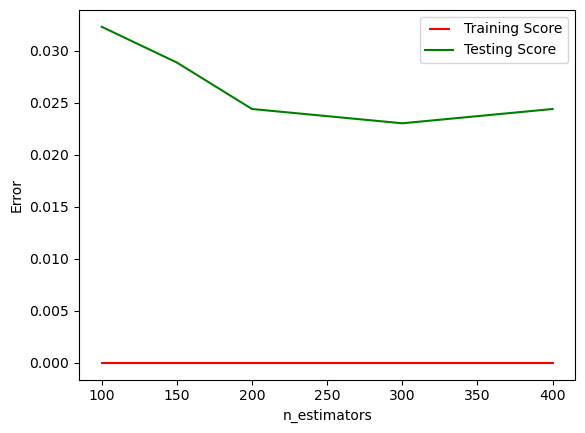

In [81]:
train_results = []
test_results = []
list_nb_trees = [100, 150, 200, 300, 400]

for nb_trees in list_nb_trees:
    modelG = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5, n_estimators= nb_trees)
    modelG.fit(x_train, y_train)

    train_results.append(1 - (modelG.score(x_train,y_train)))
    test_results.append(1 - (modelG.score(x_test, y_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('BestGradientBoostingClassifierNewData.png')

/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achyuth/miniconda3/envs/Proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when 

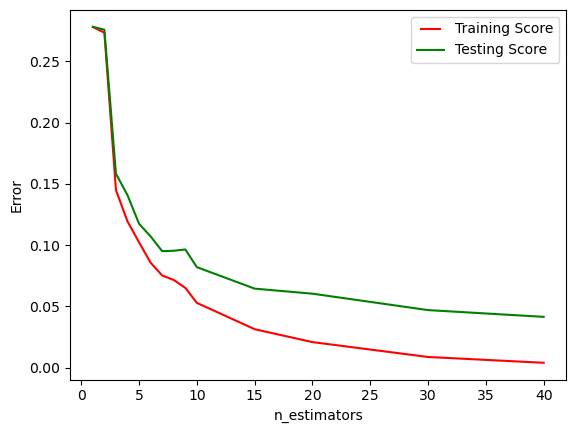

In [82]:
train_results = []
test_results = []
list_nb_trees = [1,2,3,4,5,6,7,8,9,10,15,20,30,40]

for nb_trees in list_nb_trees:
    modelG = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           loss='exponential', max_depth=5, n_estimators= nb_trees)
    modelG.fit(x_train, y_train)

    train_results.append(1 - (modelG.score(x_train,y_train)))
    test_results.append(1 - (modelG.score(x_test, y_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
fig = plt.gcf()
plt.show()
fig.savefig('Test.png')

In [18]:
file = open('PIKLE_GRADIENT/GBOOST0', 'rb')
newModel = pk.load(file)
file.close()
newModel.score(x_valid,y_valid)

0.9965650493774152

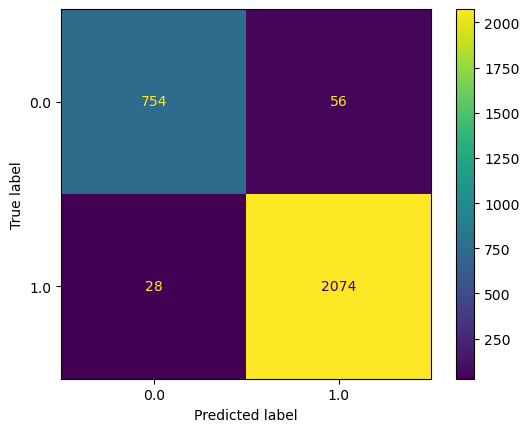

In [46]:
predictions = newModel.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=newModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newModel.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BaseModel_ConfusionMatrixLog.png')